# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [11]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Create a new dataframe from your CSV
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')


In [6]:
# Print out any information you need to understand your dataframe
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot: >

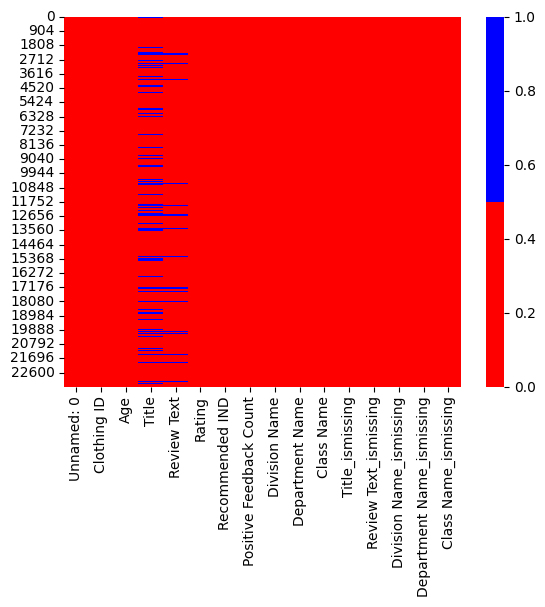

In [56]:
# Plot a heatmap of any missing data

cols = df.columns[:-1] # first 30 columns
colours = ['red', 'blue'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [38]:
# Try out a missing data percentage list!
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%
Title_ismissing - 0%
Review Text_ismissing - 0%
Division Name_ismissing - 0%
Department Name_ismissing - 0%
Class Name_ismissing - 0%
num_missing - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot: xlabel='index'>

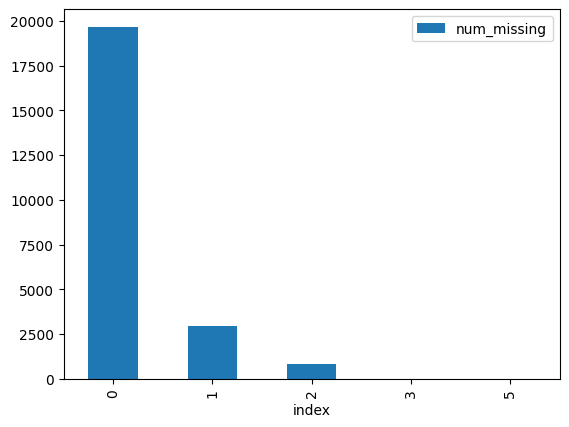

In [46]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [63]:
# Handle any missing data in your dataframe.
df['Title'] = df['Title'].fillna('_MISSING TITLE_')

<AxesSubplot: >

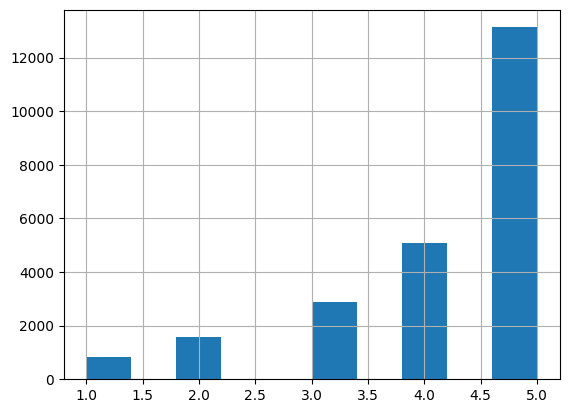

In [91]:
# Plot a histogram to see if there are any outliers.
df['Rating'].hist(bins=10)

In [69]:
# Use the describe() method
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,num_missing
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936,0.199991
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202,0.485762
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,5.000000


<AxesSubplot: >

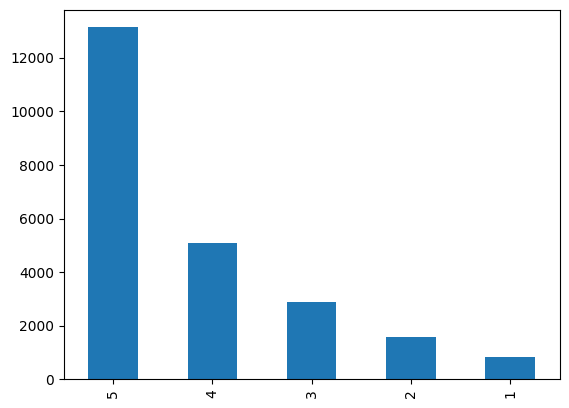

In [70]:
# Plot a bar chart
df['Rating'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

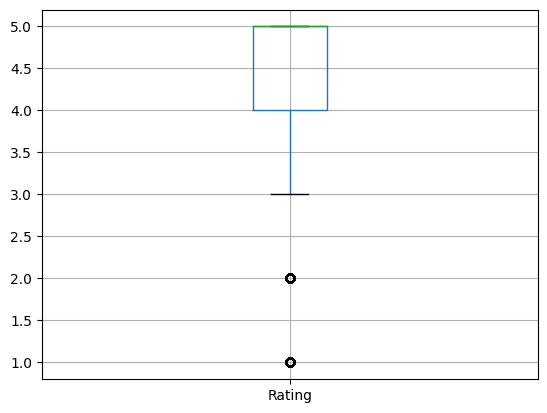

In [73]:
# Handle any outliers in your dataframe
df.boxplot(column=['Rating'])
df['Rating'].describe()

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

<AxesSubplot: >

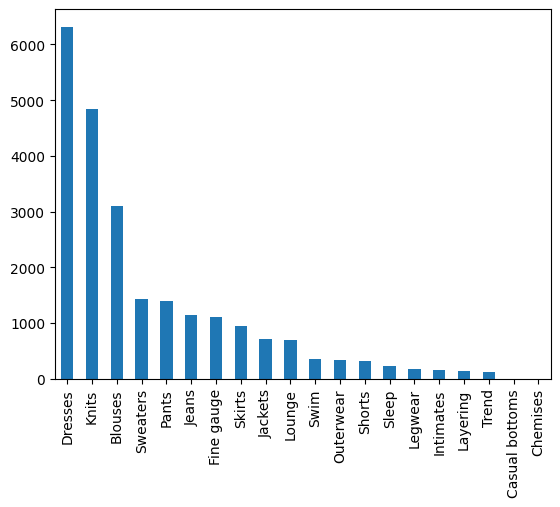

In [78]:
# Look for any irrelevant data in the dataframe. How will you handle it?
df['Class Name'].value_counts().plot.bar()

In [88]:
# Look for duplicates. How will you handle any duplicates?
key = ['Rating', 'Department Name', 'Clothing ID']

df.fillna(-999).groupby(key)['Clothing ID'].count().sort_values(ascending=False).head(10)

Rating  Department Name  Clothing ID
5       Dresses          1078           562
        Tops             862            462
        Dresses          1094           411
                         1081           338
        Tops             872            336
                         829            288
        Dresses          1110           284
        Tops             895            247
4       Dresses          1078           234
5       Tops             936            217
Name: Clothing ID, dtype: int64

In [92]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
#Age, Division name are uniformative

## Inconsistent Data
Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [90]:
# Try to convert all the strings in a column to lower or upper case. 
df['Title'] = df['Title'].str.lower()
df['Title'].value_counts(dropna=False)

_missing_                                  3810
love it!                                    136
beautiful                                    95
love                                         88
love!                                        84
                                           ... 
not for my body                               1
perfect transition dress                      1
the perfect spring dress!                     1
super soft but can make you look frumpy       1
please make more like this one!               1
Name: Title, Length: 13994, dtype: int64